In [42]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import statistics
from statistics import mode

In [23]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
from collections import Counter

In [4]:
def majority(arr):
    return(mode(arr))

In [5]:

arr = [2, 7, 3, 3, 7, 6, 6, 6, 1, 9, 0, 1, 7, 6, 3, 2]
len(arr)
majority(arr)

6

In [65]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([6, 12, 8, 7, 9])
np.sqrt(np.sum((arr2-arr1)**2))

13.228756555322953

In [6]:
def euclidean_dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [7]:
test_data1 = pd.read_csv("mnist_test.csv")
train_data1 = pd.read_csv("mnist_train.csv")



In [114]:
test_data1.shape

(9999, 785)

In [115]:
train_data1.shape

(59999, 785)

In [8]:
test_data = test_data1.head(500)
train_data = train_data1.head(10000)


In [72]:
test_data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
train_data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_labels = train_data.iloc[:,0]
test_labels = test_data.iloc[:,0]

len(train_labels)

10000

In [10]:
train_data=train_data.drop(train_data.columns[[0]], axis=1)
test_data=test_data.drop(test_data.columns[[0]], axis=1)

In [76]:
test_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
train_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_data = test_data.to_numpy()
train_data = train_data.to_numpy()

In [153]:
train_data.shape

(10000, 784)

In [154]:
test_data.shape

(500, 784)

In [88]:
#test_data[0]

In [82]:
euclidean_dist(test_data[0],train_data[0])

2920.0145547582465

In [13]:
#add train data labels to your new dataframe
#use test data labels when selecting labels for the k neighbours
def KNN(test_data,train_data,test_label,train_label,k):
    prediction_list = []
    for i in test_data:
        dist_list = []
        for j in train_data:
            dist = euclidean_dist(i,j)
            #print(dist)
            dist_list.append(dist)
        #print(len(dist_list))
        df = pd.DataFrame()
        df['label'] = train_label
        df['dist'] = dist_list
        df=df.sort_values(by=['dist'])
        #print(df)
        final = []
        for x in range(0,k+1):
            final.append(int(df.iloc[x]['label']))
        #print(final)
        prediction = majority(final)
        #print(prediction)
        prediction_list.append(prediction)
    return prediction_list
        

In [156]:
accuracy = []
k_vals = list(range(1,50,2))
for n in k_vals:
    res = KNN(test_data,train_data,test_labels,train_labels,n)
    result = pd.DataFrame()
    result['label'] = test_labels
    result['prediction'] = res
    cnt = 0
    for i in range(0,len(test_labels)):
        if res[i]==test_labels[i]:
            cnt+=1
    acc = (cnt/len(test_labels))*100
    accuracy.append(acc)
    print("K value: {}  Accuracy: {}".format(n,acc))


K value: 1  Accuracy: 92.2
K value: 3  Accuracy: 93.0
K value: 5  Accuracy: 92.80000000000001
K value: 7  Accuracy: 92.4
K value: 9  Accuracy: 92.2
K value: 11  Accuracy: 92.60000000000001
K value: 13  Accuracy: 91.8
K value: 15  Accuracy: 91.60000000000001
K value: 17  Accuracy: 91.4
K value: 19  Accuracy: 91.60000000000001
K value: 21  Accuracy: 90.8
K value: 23  Accuracy: 91.2
K value: 25  Accuracy: 90.60000000000001
K value: 27  Accuracy: 90.2
K value: 29  Accuracy: 90.2
K value: 31  Accuracy: 89.4
K value: 33  Accuracy: 89.8
K value: 35  Accuracy: 89.2
K value: 37  Accuracy: 88.8
K value: 39  Accuracy: 88.2
K value: 41  Accuracy: 87.8
K value: 43  Accuracy: 88.0
K value: 45  Accuracy: 88.2
K value: 47  Accuracy: 87.8
K value: 49  Accuracy: 87.2


In [21]:
len(train_labels)

59999

In [51]:
len(test_labels)

100

In [111]:
result

,label,prediction
0,2,2
1,1,1
2,0,0
3,4,4
4,1,1
...,...,...
95,1,1
96,7,7
97,6,6
98,9,9


In [97]:
acc

100.0

<AxesSubplot:xlabel='K value'>

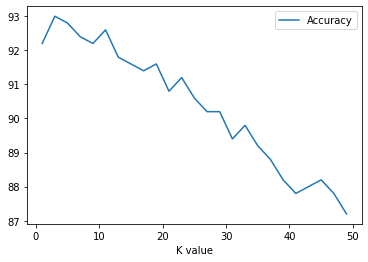

In [158]:
#500 test samples against 10,000 images
final_res = pd.DataFrame()
final_res['K value'] = k_vals
final_res['Accuracy'] = accuracy
final_res

In [157]:
#500 test images against 10,000 images
final_res.plot(kind='line',x='K value',y='Accuracy')

,K value,Accuracy
0,1,92.2
1,3,93.0
2,5,92.8
3,7,92.4
4,9,92.2
5,11,92.6
6,13,91.8
7,15,91.6
8,17,91.4
9,19,91.6


In [112]:
#100 test samples against 60,000 images
final_res = pd.DataFrame()
final_res['K value'] = k_vals
final_res['Accuracy'] = accuracy
final_res

,K value,Accuracy
0,1,100.0
1,3,100.0
2,5,100.0
3,7,99.0
4,9,98.0
5,11,98.0
6,13,98.0
7,15,98.0
8,17,98.0
9,19,97.0


<AxesSubplot:xlabel='K value'>

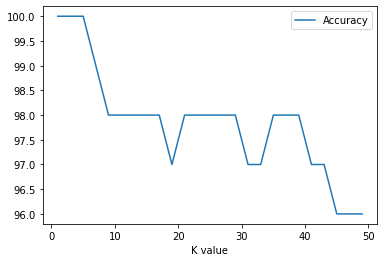

In [113]:
#100 test images against the full training dataset
final_res.plot(kind='line',x='K value',y='Accuracy')

In [14]:
accuracy = []
res = KNN(test_data,train_data,test_labels,train_labels,3)
result = pd.DataFrame()
result['label'] = test_labels
result['prediction'] = res
cnt = 0
for i in range(0,len(test_labels)):
    if res[i]==test_labels[i]:
        cnt+=1
acc = (cnt/len(test_labels))*100
accuracy.append(acc)
print("K value: {}  Accuracy: {}".format(3,acc))


K value: 3  Accuracy: 93.0


In [73]:
count_dict = Counter(test_labels)
predict_dict = Counter(res)

for key in sorted(count_dict):
    print("Number: {} Occurences: {} Predictions: {}".format(key, count_dict[key],predict_dict[key]))

Number: 0 Occurences: 42 Predictions: 45
Number: 1 Occurences: 67 Predictions: 73
Number: 2 Occurences: 55 Predictions: 48
Number: 3 Occurences: 46 Predictions: 46
Number: 4 Occurences: 55 Predictions: 55
Number: 5 Occurences: 50 Predictions: 48
Number: 6 Occurences: 43 Predictions: 45
Number: 7 Occurences: 48 Predictions: 51
Number: 8 Occurences: 40 Predictions: 37
Number: 9 Occurences: 54 Predictions: 52


In [18]:
accuracy_score(result['label'], result['prediction'])

0.93

In [19]:
cm = metrics.confusion_matrix(result['label'], result['prediction'])
print(cm)

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 1  2 48  0  0  0  1  2  1  0]
 [ 0  1  0 41  0  0  1  2  0  1]
 [ 0  1  0  0 50  0  1  0  0  3]
 [ 0  0  0  2  0 48  0  0  0  0]
 [ 1  0  0  0  1  0 41  0  0  0]
 [ 0  1  0  0  1  0  0 46  0  0]
 [ 1  0  0  2  0  0  1  0 35  1]
 [ 0  1  0  1  3  0  0  1  1 47]]


Text(0.5, 103.73999999999997, 'Predicted label')

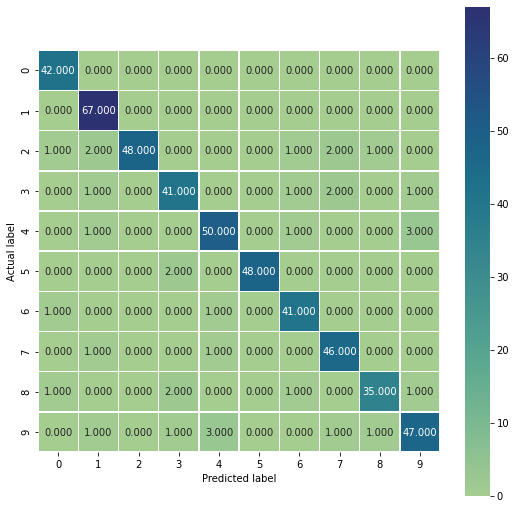

In [59]:

plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'crest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')